# Qiskit version

In [1]:
import qiskit
qiskit.__qiskit_version__     

C:\Users\SOUMYABRATA PC\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.5', 'qiskit': '0.29.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Creating my first Quantum Circuit

In [18]:
from qiskit import QuantumCircuit
import numpy as np
n=3
n_qubit=n         # number of qubits in the circuit.
n_bit=n           # number of output bits 
qc=QuantumCircuit(n_qubit,n_bit)   # Creates a QuantumCircuit object containing qubits 
                                         #   and bits(to write the measurement result)

# Measurement on qubits

In [3]:
qc.measure_all()     #  Apply measurement to all qubits
             #  Notice this command automatically places a barrier across the qubits
qc.draw()             # To visualize the circuit

░ ┌─┐      
   q_0: ─░─┤M├──────
         ░ └╥┘┌─┐   
   q_1: ─░──╫─┤M├───
         ░  ║ └╥┘┌─┐
   q_2: ─░──╫──╫─┤M├
         ░  ║  ║ └╥┘
   c: 3/════╬══╬══╬═
            ║  ║  ║ 
meas: 3/════╩══╩══╩═
            0  1  2

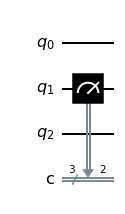

In [4]:
qc=QuantumCircuit(n_qubit,n_bit)
qc.measure(1,2)     #  Apply measurement on qubit_1 and write the measurement result in classical bit_2
qc.draw('mpl')

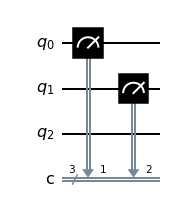

In [5]:
qc=QuantumCircuit(n_qubit,n_bit)
qc.measure([0,1],[1,2])   #  first list is where we apply the Measurement
                          #  second list is index of bits where we write the measurement result.
qc.draw('mpl')    

In [6]:
from qiskit.visualization import circuit_drawer
circuit_drawer(qc)                           # Another syntax to draw the circuit

┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
q_2: ─╫──╫─
      ║  ║ 
c: 3/═╩══╩═
      1  2

# Backends

In [7]:
from qiskit import BasicAer
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [8]:
from qiskit import Aer
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

# Aer Simulator

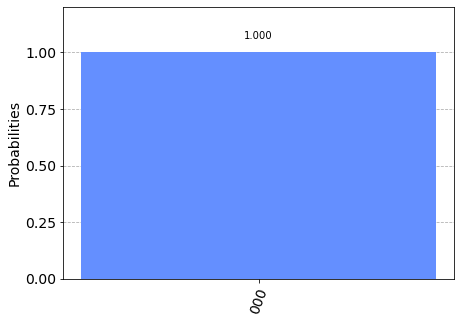

In [9]:
from qiskit import assemble
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(3,3)
sim = Aer.get_backend('aer_simulator')     # performing the operations on quantum simulator not on real quantum device
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)                     # Ploting histogram data of result

# Statevector Simulator

In [10]:
from qiskit import execute
qc = QuantumCircuit(2)
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim, shots=1024)    # shots is optional  , you are executing the circuit 1024 times
result = job.result()
counts = result.get_counts()
#plot_histogram(counts)
result.get_statevector(qc)     #  To get the output state vector

from qiskit.visualization import array_to_latex
array_to_latex(result.get_statevector(qc))          #  writing the statevector in latex.

<IPython.core.display.Latex object>

# Qasm simulator

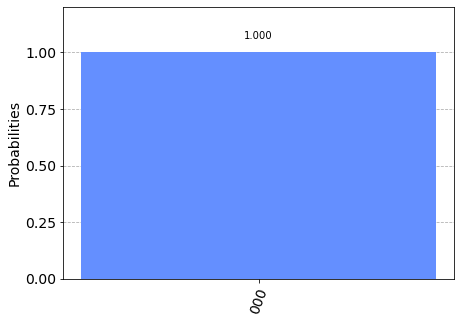

In [11]:
qc = QuantumCircuit(3,3)
couple_map = [[0, 1],[1, 2]]
sim = Aer.get_backend('qasm_simulator')
job = execute(qc, sim, shots=1024, coupling_map=couple_map)     #  coupling_map is optional argument
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# Unitary Simulator

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
sim = Aer.get_backend('unitary_simulator')
job = execute(qc,sim)    # shots is optional
result = job.result()
unitary = result.get_unitary()     # Identity direct product with Hadamard gate
array_to_latex(unitary)            #  gives matrix representation of the unitary operation

<IPython.core.display.Latex object>

# Combining two quantum circuits

In [14]:
qc1 = QuantumCircuit(2)
qc1.x(1)
qc2 = QuantumCircuit(2)
qc2.h(1)
qc=qc1 + qc2
qc.draw()

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

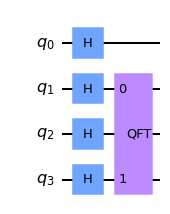

In [15]:
qc = QuantumCircuit(4)
qc.h(range(4))

from qiskit.circuit.library import QFT
qft = QFT(2)
qft.draw()
new_qc = qc.compose(qft,[1,3])    # connect the qft Gate to 1st and 3rd qubit of the circuit qc 
new_qc.draw('mpl')
#qc.qubits

# Initialize qubit's state

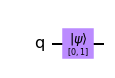

In [16]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')          # Let's view our circuit

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


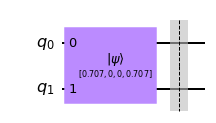

In [19]:
initial_state = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]   
qc = QuantumCircuit(2)
qc.initialize(initial_state,[0,1])         # Initialize a two qubit state
qc.save_statevector()
sim = Aer.get_backend('statevector_simulator')
result = execute(qc,sim).result()
output_state = result.get_statevector()
print(output_state)
qc.draw('mpl')           # Draw the initialized circuit

Qubit State = [0.70710678+0.j         0.        +0.70710678j]


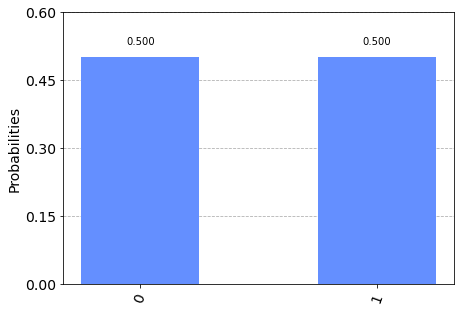

In [20]:
qc = QuantumCircuit(1)
initial_state = [ 1/np.sqrt(2), 1j/np.sqrt(2)]
qc.initialize(initial_state,0)
qc.save_statevector()

qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
print("Qubit State = " + str(result.get_statevector()))
plot_histogram(counts)    #  There is 50 % probability to be in "|0>" and in "|1>" state 
                          #  but state has not collapsed. (No Measurement performed)


# 2 histograms in single plot

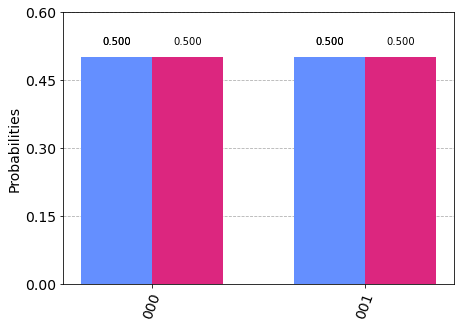

In [22]:
qc = QuantumCircuit(3)
qc.h(0)
sim = Aer.get_backend('statevector_simulator')     
qobj = assemble(qc)
result = sim.run(qobj).result()
counts1 = result.get_counts()

job2 = execute(qc, sim)
counts2 = job2.result().get_counts()
plot_histogram([counts1,counts2])

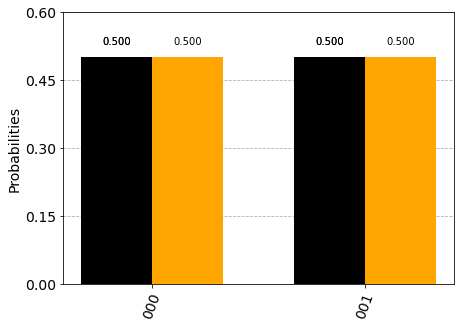

In [23]:
plot_histogram([counts1,counts2], color = ['black', 'orange'])

# Visualizing qubit's state

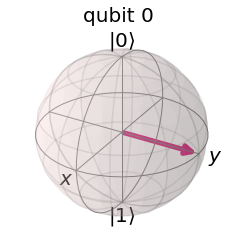

In [24]:
from qiskit.visualization import plot_bloch_multivector
Qubit_State = [ 1/np.sqrt(2), 1j/np.sqrt(2)]
plot_bloch_multivector(Qubit_State)    # takes qubit's statevector in the argument

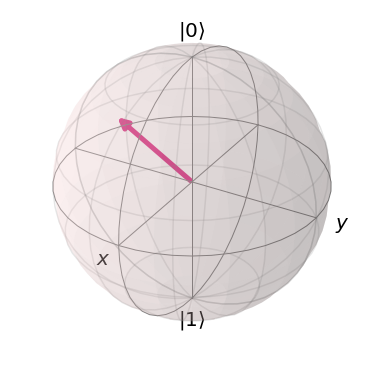

In [25]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,1])    # [<x>, <y>, <z>] bloch vector
                              #  takes qubit's blochvector in the argument

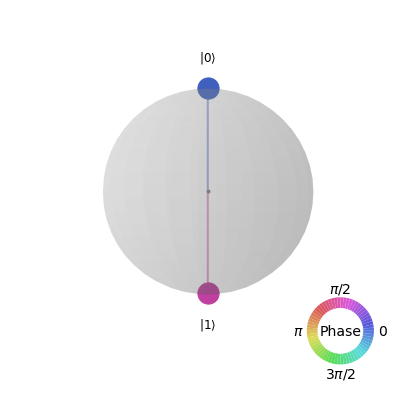

In [26]:
from qiskit.visualization import plot_state_qsphere
Qubit_State = [ 1/np.sqrt(2), 1j/np.sqrt(2)]
plot_state_qsphere(Qubit_State)   # plotting in Q-sphere
                                  #  This single qubit state is superposition of |0> & |1>.
                                  #  Also there is a phase difference of (np.pi/2) between |0> & |1>

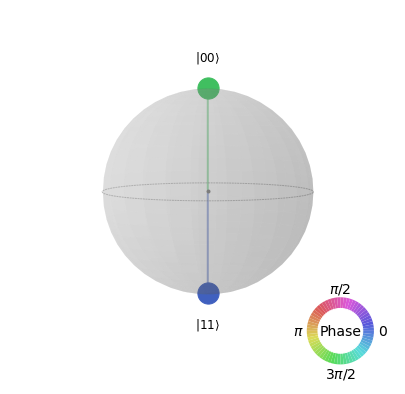

In [27]:
Qubit_State = [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)]
plot_state_qsphere(Qubit_State)       #  Plotting a two qubit state     

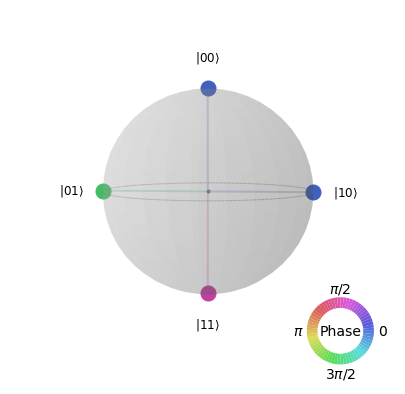

In [28]:
Qubit_State = [1/2, -1j/2, 1/2, 1j/2]     #  This two qubit state is a superposition of four states(|00>, |01>, |10>, |11>)
plot_state_qsphere(Qubit_State)      

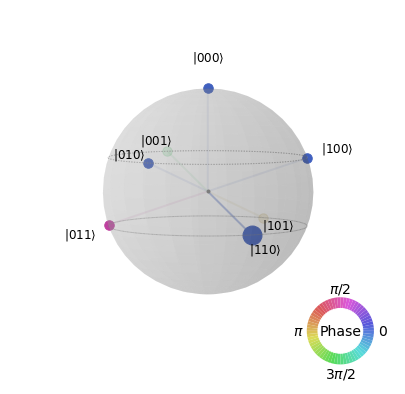

In [29]:
Qubit_State = [1/8, -1j/8, 1/8, 1j/8, 1/8, -1/8, 1/4, 0] 
plot_state_qsphere(Qubit_State)      #  Notice how the size of state |110> is bigger than others 
                                                    #   as it has higher amplitude

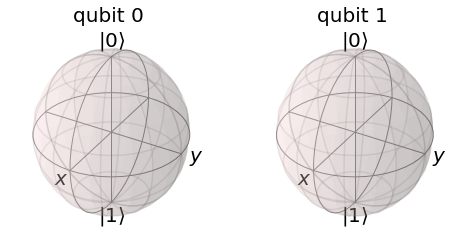

In [30]:
bell_state = [0, 1/np.sqrt(2), 1/np.sqrt(2), 0]    # plotting Bell State in bloch sphere
plot_bloch_multivector(bell_state)                 #  As this is an entangled state 
                                                #  decomposition into two separate qubits is not possible

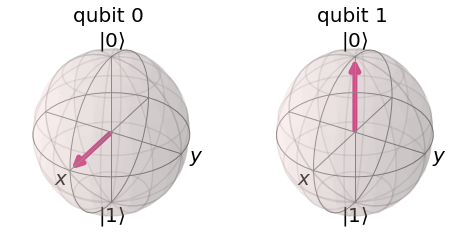

In [31]:
state = [1/np.sqrt(2), 1/np.sqrt(2), 0, 0]      #  Here the two qubits are not entangled. 
plot_bloch_multivector(state)

# Read a QASM file

In [32]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.t([0,1])
qc.measure_all()
qc.draw()

┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ T ├─░─┤M├──────
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├┤ T ├─░──╫─┤M├───
             └───┘└───┘ ░  ║ └╥┘┌─┐
   q_2: ────────────────░──╫──╫─┤M├
                        ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

Now we will convert this QuantumCircuit object to a QASM String.

In [33]:
#  QASM = Quantum Assembly Language  #
qc.qasm()      #  converts QuantumCircuit to QASM string
print(qc.qasm())     # to display properly use print method
                    #  Note down the QASM string format.

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg meas[3];
h q[0];
cx q[0],q[1];
t q[0];
t q[1];
barrier q[0],q[1],q[2];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];



In [34]:
qc.qasm(formatted=True, filename='my_circuit.qasm')    # Saving the QASM string as a file with name = 'my_circuit.qasm'
new_qc = QuantumCircuit.from_qasm_file('my_circuit.qasm')     # Read the QASM file and generate QuantumCircuit object
new_qc.draw()

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg meas[3];
h q[0];
cx q[0],q[1];
t q[0];
t q[1];
barrier q[0],q[1],q[2];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];



┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ T ├─░─┤M├──────
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├┤ T ├─░──╫─┤M├───
             └───┘└───┘ ░  ║ └╥┘┌─┐
   q_2: ────────────────░──╫──╫─┤M├
                        ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [35]:
qasm_str = """                                     
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
creg c[1];

h q[0];                                           
z q[0];"""                                        #  qasm_str is a QASM string object
qc = QuantumCircuit.from_qasm_str(qasm_str)      #  load the QASM string and convert to QuantumCircuit object
#qc = QuantumCircuit.from_qasm_file("file.qasm")    #  loading the QASM from a file

qc.draw()


┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘
c: 1/══════════

In [36]:
qc = QuantumCircuit(3, 1)
qc.barrier()
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 2)
qc.barrier()
qc.measure(2,0)
qc.draw(), print("Depth_of_Circuit = " + str(qc.depth())),print("Width of circuit = "+ str(qc.width()))
                                 # width = number of (qubits + bits) in the circuit

Depth_of_Circuit = 4
Width of circuit = 4


(      ░                 ░    
 q_0: ─░───■─────────■───░────
       ░   │         │   ░    
 q_1: ─░───┼────■────■───░────
       ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
 q_2: ─░─┤ X ├┤ X ├┤ X ├─░─┤M├
       ░ └───┘└───┘└───┘ ░ └╥┘
 c: 1/══════════════════════╩═
                            0 ,
 None,
 None)

# Quantum Register

In [37]:
from qiskit import QuantumRegister
input_register = QuantumRegister(2,name = 'inp')  # size = 2 two qubits
ancilla = QuantumRegister(1,name = 'anc')
qc = QuantumCircuit(input_register,ancilla)
qc.h(input_register)      #   qc.h(input_register[0:2])
qc.x(ancilla)            #   qc.x(ancilla[0])


qc.draw()


┌───┐
inp_0: ┤ H ├
       ├───┤
inp_1: ┤ H ├
       ├───┤
anc_0: ┤ X ├
       └───┘

In [38]:
from qiskit import ClassicalRegister

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)

qc.draw()

┌───┐          ┌───┐           ░ ┌─┐      
      q_0: ┤ H ├───────■──┤ H ├───────────░─┤M├──────
           ├───┤       │  └───┘┌───┐      ░ └╥┘┌─┐   
      q_1: ┤ H ├───────┼────■──┤ H ├──────░──╫─┤M├───
           ├───┤       │    │  └───┘┌───┐ ░  ║ └╥┘┌─┐
      q_2: ┤ H ├───────┼────┼────■──┤ H ├─░──╫──╫─┤M├
           ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘ ░  ║  ║ └╥┘
ancilla_0: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─────────╫──╫──╫─
           └───┘└───┘└───┘└───┘└───┘         ║  ║  ║ 
      c: 3/══════════════════════════════════╩══╩══╩═
                                             0  1  2

# Fidelity

In [39]:
initial_state = [1/np.sqrt(3), np.sqrt(2/3)]
qr = QuantumRegister(1,'q')
qc = QuantumCircuit(qr)
qc.initialize(initial_state,0)
sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result()
final_state = result.get_statevector()

from qiskit.quantum_info import state_fidelity
state_fidelity(initial_state, final_state)    # fidelity = 1, they are same state


1.0

In [40]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j/2)*op_a
average_gate_fidelity(op_a, op_b)
process_fidelity(op_a, op_b)

1.0

# convert quantum circuit into Operator

In [41]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [43]:
import qiskit.quantum_info as qi
unitary_qc = qi.Operator(qc)   #  Turns a quantum circuit to an Operator
print(unitary_qc.data)
array_to_latex(unitary_qc)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


<IPython.core.display.Latex object>

# Some other gates

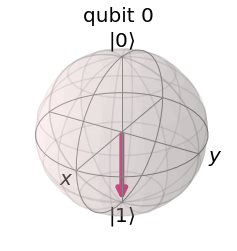

In [44]:
qc = QuantumCircuit(1,1)
# Insert code fragment here
qc.h(0)
#qc.rz(-np.pi/2,0) 
#qc.rx(np.pi/2,0)
qc.ry(np.pi/2,0)
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate) 

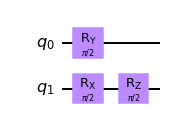

In [45]:
qc = QuantumCircuit(2)
qc.ry(np.pi/2,0)    # rotation with respect to y axis.   ry(theta,qubit)
qc.rx(np.pi/2,1)    # rotation with respect to x axis.
qc.rz(np.pi/2,1)    # rotation with respect to z axis.
#qc.swap(0,1)
qc.draw('mpl')

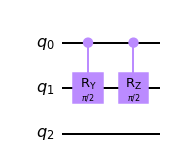

In [46]:
qc = QuantumCircuit(3)
qc.cry(np.pi/2,0,1)       # Controlled-RY (cry) Gate   cry(theta, control qubit, target qubit)
qc.crz(np.pi/2,0,1)        # Controlled-RZ (crz) Gate
qc.draw('mpl')

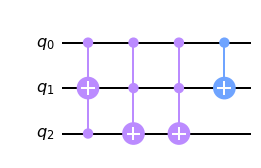

In [47]:
qc = QuantumCircuit(3)
qc.mct([0,2],1)           # Multiple-Control Toffoli gate   mct(list of control qubits,target qubit) 
qc.toffoli(0,1,2)
qc.ccx(0,1,2)
qc.cnot(0,1)
qc.draw('mpl')

In [48]:
qc = QuantumCircuit(1)
qc.p(np.pi/4, 0)    # P(Phase) gate
qc.i(0)     # Identity gate
qc.s(0)      # S gate
qc.sdg(0)    # S-Dagger gate
qc.t(0)          # T gate
qc.tdg(0)        # T-Dagger gate
qc.draw()

┌────────┐┌───┐┌───┐┌─────┐┌───┐┌─────┐
q_0: ┤ P(π/4) ├┤ I ├┤ S ├┤ Sdg ├┤ T ├┤ Tdg ├
     └────────┘└───┘└───┘└─────┘└───┘└─────┘

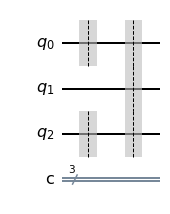

In [49]:
qc = QuantumCircuit(3,3)
qc.barrier([0,2])      # barrier(list of qubits)
qc.barrier()
qc.draw('mpl')

# Density Matrix

In [50]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
rho = qi.DensityMatrix(qc)   # to get density matrix of a state, which is produced by a circuit
#print(rho), qc.draw()
rho.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

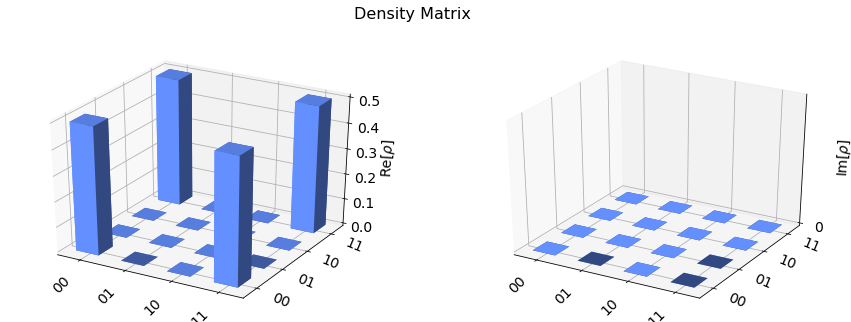

In [51]:
from qiskit.visualization import plot_state_city
plot_state_city(rho, title='Density Matrix')          # plot_state_city(rho.data)

# Plot gate map with error rates

In [52]:
from qiskit import IBMQ
provider = IBMQ.load_account()

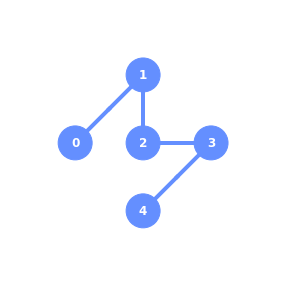

In [53]:
from qiskit.visualization import plot_gate_map, plot_error_map
from qiskit.tools.monitor import backend_overview
backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend)

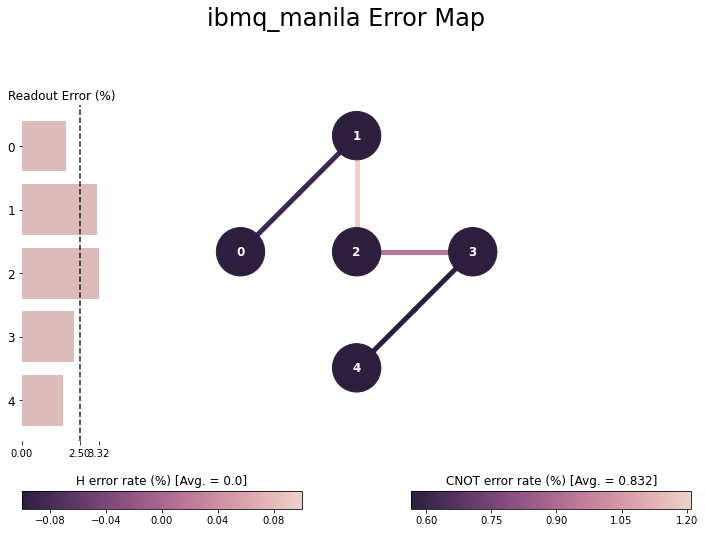

In [54]:
plot_error_map(backend)

# Convert circuit to Gate object

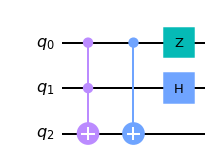

In [55]:
qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.cx(0,2)
qc.h(1) 
qc.z(0)
qc.draw('mpl')

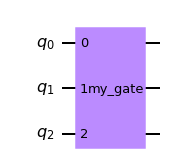

In [56]:
qc_gate = qc.to_gate()        # converts QuantumCircuit object to Gate object
qc_gate.name = 'my_gate'      # Name the gate
circ = QuantumCircuit(3)
circ.append(qc_gate,[0,1,2])  #  Adding the Gate to another circuit
circ.draw('mpl')

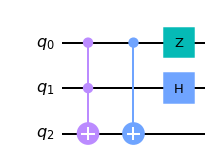

In [57]:
circ_decomp = circ.decompose()   #  Decompose the circuit 
circ_decomp.draw('mpl')

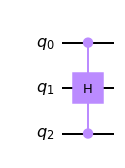

In [58]:
from qiskit.circuit.library import HGate
ch = HGate().control(2)      # here we specify how many controls we want
qc = QuantumCircuit(3)  
qc.append(ch,[0,2,1])        # the [a,b,c] correspond to controls and target respectively
qc.draw('mpl')

# Another way of creating quantum circuit

In [59]:
from qiskit.circuit.library import HGate, XGate, Barrier
qc = QuantumCircuit(2)
qc.append(HGate(), [0])
qc.append(XGate(), [1])
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘